<a href="https://colab.research.google.com/github/ZaAhmed/pre_class_cs166/blob/master/CS166_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')

import random as rd
from pylab import *
import networkx as nx
import random as rd

In [0]:
def initialize():
    global g
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update():
    global g
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

In [0]:
# measure how many steps it will take until the system reaches a consensus (i.e., homogenized state). Then
#run multiple simulations (Monte Carlo simulations) to calculate the average time length
#needed for consensus formation in the original voter model.
def initialize():
    global g, timestep
    timestep = 0
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0

def observe():
    global g
    cla()
    title(f't = {str(timestep)}')
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)
    a = sum([g.nodes[i]['state'] for i in g.nodes]) #the first color
    b = 33 - a # the second color
    return(a, b, timestep) # returns the number of nodes for each color

def update():
    global g, timestep
    timestep += 1
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']

(0, 33, 210)

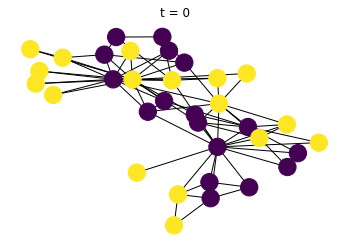

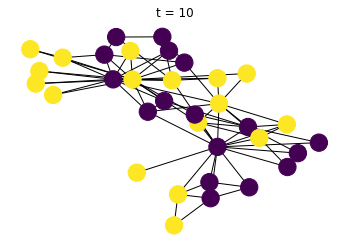

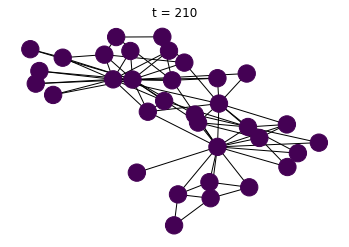

In [28]:
# Run the simulator for 100 steps and show some of the steps.
initialize()
observe()
figure()
print('')

for i in range(10):
    update()
observe()
figure()
print('')

for i in range(200):
    update()
observe()
